# import relevant packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import scale as s
from scipy.cluster.hierarchy import dendrogram, linkage

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_final = pd.read_csv('data_final')

In [3]:
Z = sch.linkage(data_final,method='ward')
Z

array([[2.99000000e+02, 3.00000000e+02, 1.41424892e+00, 2.00000000e+00],
       [6.72000000e+02, 6.73000000e+02, 1.41424892e+00, 2.00000000e+00],
       [2.15900000e+03, 2.16000000e+03, 1.41424892e+00, 2.00000000e+00],
       ...,
       [1.09000000e+04, 1.09010000e+04, 5.96907284e+04, 2.42900000e+03],
       [1.09020000e+04, 1.09030000e+04, 8.31128774e+04, 3.02500000e+03],
       [1.09040000e+04, 1.09050000e+04, 2.00293424e+05, 5.45400000e+03]])

Text(0.5, 1.0, 'Hierarchical Clustering')

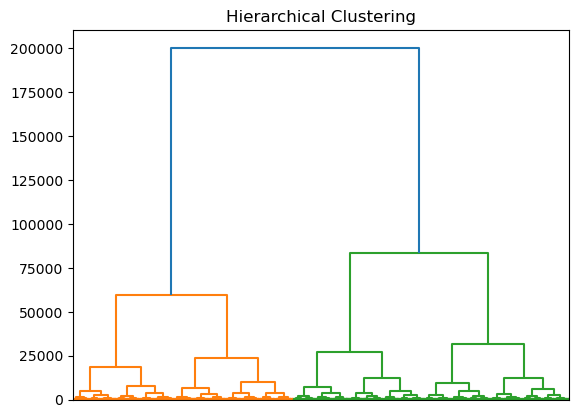

In [4]:
# Creating and plotting a dendogram
den = sch.dendrogram(Z)
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,     
    top=False,         
    labelbottom=False) 
plt.title('Hierarchical Clustering')

In [5]:
# Importing packages
from sklearn.cluster import AgglomerativeClustering 

In [6]:
# Creating a Agglomerative Clustering
hc_model = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='ward')

In [7]:
# Fitting the model
y_cluster = hc_model.fit_predict(data_final)

In [8]:
data_clustered = data_final.copy()

In [9]:
data_clustered["Cluster"] = y_cluster.astype('object')

In [10]:
data_clustered.head()

,Unnamed: 0,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,...,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,id,Cluster
0,0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1,1
1,1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,2,1
2,2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,3,1
3,3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,4,1
4,4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,5,1


In [11]:
result = data_clustered.copy()

In [12]:
result.replace({'Cluster' : 1} , 'Positive' , inplace=True)
result.replace({'Cluster' : 0} , 'Negeative' , inplace= True)

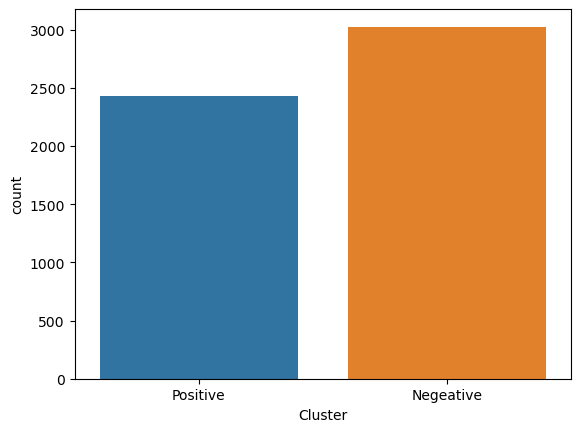

In [13]:
sns.countplot(x='Cluster', data=result)
plt.show()